In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

# Baixar dados necessários do NLTK
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('rslp')


import re
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("imdb-reviews-pt-br.csv", sep="," , encoding="utf8")

df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [20]:
# Separacao dos dados por sentimento
df.groupby('sentiment').count()

,id,text_en,text_pt
sentiment,,,
neg,24765,24765,24765
pos,24694,24694,24694


In [21]:

# Remove columns e create column
df.drop(columns=['id', 'text_en'], axis=1, inplace=True)
df['classification'] = df["sentiment"].replace(["neg", "pos"],[0, 1])

# Texto para minusculo
text_lower = [t.lower() for t in df['text_pt']]
df['text_pt'] = text_lower

df.head(5)

,text_pt,sentiment,classification
0,"mais uma vez, o sr. costner arrumou um filme p...",neg,0
1,este é um exemplo do motivo pelo qual a maiori...,neg,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,nem mesmo os beatles puderam escrever músicas ...,neg,0
4,filmes de fotos de latão não é uma palavra apr...,neg,0


In [22]:
# funcao para remover brackets
def remove_brackets(column):
    for x in range(1,len(column)):
        return(re.sub('[\[\]]','',repr(column)))

In [23]:
%%time

from nltk.tokenize import word_tokenize 
stop_words = nltk.corpus.stopwords.words('portuguese')
stemmer = nltk.stem.RSLPStemmer()

# Trabalhar com stemmer e stopwords da base de treinamento/teste

# Definir stopwords e stemmer
stop_words = set(stopwords.words('portuguese'))
stemmer = RSLPStemmer()

# Função para remover stop words e aplicar stemming
def process_text(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if word not in stop_words]
    stemmed_sentence = [stemmer.stem(word) for word in filtered_sentence]
    return ' '.join(stemmed_sentence)

# Aplicar a função a toda a coluna 'text_pt' do DataFrame
df['text_pt'] = df['text_pt'].apply(process_text)


CPU times: total: 1min 7s
Wall time: 2min 57s


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Regex para remover alguns valores do dataset  (simbolos, numeros...)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Cria o 'vetorizador' de acordo com os parametros abaixo
cv = CountVectorizer(lowercase=True,stop_words=None,ngram_range = (1,2),
                     tokenizer = token.tokenize)

# Matrixsparse da representação da coluna  text_pt
text_counts= cv.fit_transform(df['text_pt'])

In [25]:
# Vocabulario
cv.vocabulary_

{'vez': 2261807,
 'sr': 2047096,
 'costn': 526753,
 'arrum': 181934,
 'film': 921383,
 'temp': 2115837,
 'necess': 1482670,
 'al': 89643,
 'm': 1319618,
 'terr': 2130363,
 'seq': 1970835,
 'resgat': 1854630,
 'mar': 1349114,
 'qual': 1775761,
 'pouc': 1709616,
 'simples': 2003331,
 'import': 1119199,
 'nenhum': 1488067,
 'person': 1648018,
 'maior': 1333759,
 'fantasm': 887527,
 'arm': 175679,
 'ri': 1873473,
 'cost': 526073,
 'realiz': 1819855,
 'log': 1299392,
 'in': 1125587,
 'ci': 411312,
 'esquec': 816970,
 'tard': 2103864,
 'dev': 639074,
 'arrog': 180998,
 'superconfi': 2077443,
 'ashton': 186080,
 'kutch': 1241740,
 'problem': 1741811,
 'sai': 1924913,
 'garot': 991939,
 'pens': 1628481,
 'melhor': 1378176,
 'qualqu': 1777529,
 'outr': 1570955,
 'pesso': 1658913,
 'redor': 1832261,
 'mostr': 1440491,
 'sinal': 2005663,
 'desorden': 626662,
 'nic': 1498132,
 'obst': 1534123,
 'cul': 547933,
 'parec': 1598398,
 'venc': 2245846,
 'final': 934067,
 'bem': 262494,
 'mei': 1375595,
 

In [27]:

# Importando biliotecas para seleção de amostra, modelo e avaliação do modelo.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['classification'], 
                                                    test_size=0.34, random_state=1, 
                                                    shuffle=True)
# Criar modelo e treinar
clf = MultinomialNB().fit(X_train, y_train)

# Fazendo predict do valor de X para teste de acuracidade
y_predicted = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print("MultinomialNB Accuracy:", round(accuracy, 3))


MultinomialNB Accuracy: 0.881


In [32]:
# Separa por parágrafos 
with open('texto_teste.txt', 'r', encoding='utf-8') as file_teste:
    paragraph = file_teste.read().split('\n\n')

# Separa por frases
with open('texto_teste.txt', 'r', encoding='utf-8') as file_teste:
    phrase = file_teste.read().split('.')


In [33]:
#Importar stemmer novamente
stemmer = nltk.stem.RSLPStemmer()

# Criar dataframe
df_result = pd.DataFrame()


# Fazer a tokanização, remocao de stop words e 
# transformar os dados para predict
neg,pos=0,0
for x in range(0,len(phrase)-1):

    # Texto tokenizado
    text_tokenized = word_tokenize(phrase[x])

    # Remove stop words do texto
    filtered_sentence = [w for w in text_tokenized if not w in stop_words] 

    # Cria stemmer do texto input
    line =  [stemmer.stem(word) for word in filtered_sentence]
    line = (remove_brackets(line))

    # Criar prediction para cada frase
    value_trans = cv.transform([line])
    predict_phrase = clf.predict(value_trans)

    # Contar por tipo de prediction (positivo e negativo)
    if predict_phrase==0:pos+=1
    else:neg+=1

# Salvar valores no dataframe
df_result['positive'] = [pos]
df_result['negative'] = [neg]

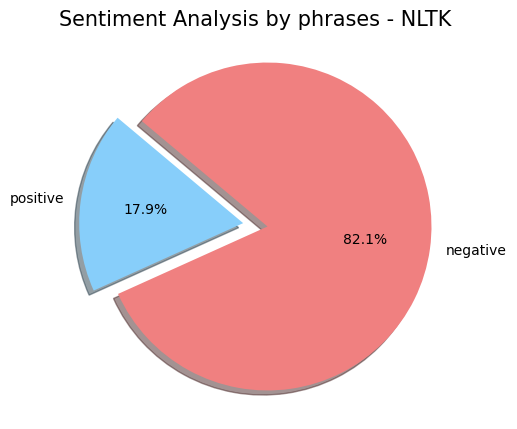

Quantity by paragraph: 9
Quantity by phrases: 28
Quantity by positives phrases: 5
Quantity by negatives phrases: 23


In [35]:
def generate_piechart(df_result):
    
    import matplotlib.pyplot as plt
    labels = df_result.columns.tolist()
    sizes = df_result.values.tolist()[0]
    color = ['lightskyblue', 'lightcoral']
    explode = (0.15, 0)

    fig1, ax1 = plt.subplots(figsize=(5,5))
    ax1.pie(sizes, labels=labels,  explode=explode,
            shadow=True, autopct='%1.1f%%',  startangle=140, colors=color)

    ax1.set_title('Sentiment Analysis by phrases - NLTK', fontsize=15)

    ax1.axis('equal')
    plt.show()
    print("Quantity by paragraph: {}".format(len(paragraph)))
    print("Quantity by phrases: {}".format(len(phrase)-1))
    print("Quantity by positives phrases: {}".format(df_result['positive']
                                                     .values.tolist()[0]))
    
    print("Quantity by negatives phrases: {}".format(df_result['negative']
                                                     .values.tolist()[0]))
    
# Gerar gráfico    
generate_piechart(df_result)